## Book Crossing - CF exploratory analysis

In [3]:
import numpy as np
import pandas as pd
from pandas.errors import SettingWithCopyWarning
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [39]:
ratingsDF = pd.read_csv("book_crossing/book_ratings.dat", sep="\t")
ratingsDF.columns = ["userId", "bookId", "rating"]
ratingsDF

,userId,bookId,rating
0,1,6264,7.0
1,1,4350,7.0
2,1,6252,5.0
3,1,202,9.0
4,1,6266,6.0
...,...,...,...
62651,2945,15719,8.0
62652,2945,11960,6.0
62653,2945,8515,9.0
62654,2945,9417,7.0


In [40]:
booksDF = pd.read_csv("book_crossing/items_info.dat", sep="\t", usecols=[0, 1, 2, 3, 4])
booksDF.columns = ["ISBN", "title", "author", "year", "company"]
booksDF

,ISBN,title,author,year,company
1,0060973129,Decision in Normandy,Carlo D'Este,1991,NaN
2,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,NaN
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,NaN
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,NaN
5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,NaN
...,...,...,...,...,...
17380,0449209202,Guide to Confident Living,Norman Vincent Peale,1985,NaN
17381,2209014026,Ludwig Feuerbach,F. Engels,1976,NaN
17382,070892722X,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers,1992,NaN
17383,1570031843,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell,1997,NaN


Since the column "company" is corrupt, but we don't need it, we can drop it.

In [41]:
booksDF.drop("company", axis=1, inplace=True)
booksDF

,ISBN,title,author,year
1,0060973129,Decision in Normandy,Carlo D'Este,1991
2,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994
5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999
...,...,...,...,...
17380,0449209202,Guide to Confident Living,Norman Vincent Peale,1985
17381,2209014026,Ludwig Feuerbach,F. Engels,1976
17382,070892722X,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers,1992
17383,1570031843,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell,1997


In [42]:
booksDF["bookId"] = booksDF.index

In [44]:
df = ratingsDF.merge(booksDF[['bookId', 'title']])
df

,userId,bookId,rating,title
0,1,6264,7.0,Something Wicked This Way Comes
1,496,6264,8.0,Something Wicked This Way Comes
2,676,6264,10.0,Something Wicked This Way Comes
3,1842,6264,10.0,Something Wicked This Way Comes
4,1,4350,7.0,The Mists of Avalon
...,...,...,...,...
62651,2945,16981,7.0,"Jessi Ramsey, Pet Sitter (Baby-Sitters Club (P..."
62652,2945,14501,7.0,STAY AWAY FROM THE TREEHOUSE (GHOSTS OF FEAR S...
62653,2945,3490,8.0,Bright Eyes (Coulter Family Series)
62654,2945,15719,8.0,Arcadia


<AxesSubplot: >

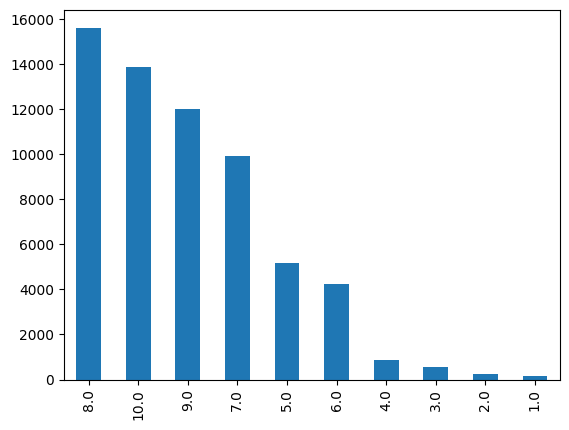

In [45]:
df.rating.value_counts().plot(kind = "bar")

### Mapping users and items

In [46]:
map_users = {user: u_id for u_id, user in enumerate(df.userId.unique())}
map_items = {item: i_id for i_id, item in enumerate(df.bookId.unique())}

df["bookId"] = df["bookId"].map(map_items)
df["userId"] = df["userId"].map(map_users)

In [47]:
df.head()

,userId,bookId,rating,title
0,0,0,7.0,Something Wicked This Way Comes
1,1,0,8.0,Something Wicked This Way Comes
2,2,0,10.0,Something Wicked This Way Comes
3,3,0,10.0,Something Wicked This Way Comes
4,0,1,7.0,The Mists of Avalon


In [49]:
bookId_title = {}

for idx, row in df.iterrows():
    bookId_title[row["bookId"]] = row["title"]

### Split Dataset 

In [50]:
train, test = train_test_split(df, test_size = 0.33, random_state = 56)
train.to_csv("train.dat", index=False, header=False, sep='\t', encoding="CP1250", errors="ignore")
test.to_csv("test.dat", index=False, header=False, sep='\t', encoding="CP1250", errors="ignore")

### Train and predict

In [51]:
from caserec.recommenders.item_recommendation.userknn import UserKNN

UserKNN("train.dat", "test.dat", "rank_userknn.dat", as_binary=True).compute(as_table=True, metrics=['NDCG'])

[Case Recommender: Item Recommendation > UserKNN Algorithm]

train data:: 1295 users and 12993 items (41979 interactions) | sparsity:: 99.75%
test data:: 1295 users and 9373 items (20677 interactions) | sparsity:: 99.83%

training_time:: 10.155702 sec
prediction_time:: 40.223188 sec


NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.133591	0.228782	0.253312	0.266643	


In [52]:
ranking = pd.read_csv('rank_userknn.dat', sep='\t', names=["userId", "bookId", "rating"])
ranking['title'] = ranking.bookId.map(bookId_title)
ranking.head(5)

,userId,bookId,rating,title
0,0,27,1.459090,"Silverlight: The Arcana, Book II (Arcana/Morga..."
1,0,196,1.153983,"Past Lives, Present Dreams: How to Use Reincar..."
2,0,4890,0.507697,"The Two Towers (The Lord of the Rings, Part 2)"
3,0,4889,0.494011,The Fellowship of the Ring (The Lord of the Ri...
4,0,2501,0.464847,TERROR FIRMA


In [53]:
from caserec.recommenders.item_recommendation.itemknn import ItemKNN

ItemKNN("train.dat", "test.dat", "rank_itemknn.dat", as_binary=True).compute(as_table=True, metrics=['NDCG'])

[Case Recommender: Item Recommendation > ItemKNN Algorithm]

train data:: 1295 users and 12993 items (41979 interactions) | sparsity:: 99.75%
test data:: 1295 users and 9373 items (20677 interactions) | sparsity:: 99.83%

training_time:: 197.460227 sec
prediction_time:: 295.349787 sec


NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.064865	0.098014	0.106581	0.114735	


In [54]:
ranking = pd.read_csv('rank_itemknn.dat', sep='\t', names=["userId", "bookId", "rating"])
ranking['title'] = ranking.bookId.map(bookId_title)
ranking.head(5)

,userId,bookId,rating,title
0,0,27,1.611218,"Silverlight: The Arcana, Book II (Arcana/Morga..."
1,0,878,1.367028,Stalking Fiona
2,0,8016,1.367028,Seed of Doubt: A Father Dowling Mystery
3,0,11242,1.310854,Mein Moskau: Notizen aus der Sowjetunion
4,0,4876,1.288757,Posies &amp


In [55]:
from caserec.recommenders.item_recommendation.most_popular import MostPopular

MostPopular("train.dat", "test.dat", "rank_mostPopular.dat").compute(as_table=True, metrics=['NDCG'])

[Case Recommender: Item Recommendation > Most Popular]

train data:: 1295 users and 12993 items (41979 interactions) | sparsity:: 99.75%
test data:: 1295 users and 9373 items (20677 interactions) | sparsity:: 99.83%

prediction_time:: 35.196361 sec


NDCG@1	NDCG@3	NDCG@5	NDCG@10	
0.047104	0.083912	0.096772	0.118713	


In [56]:
ranking = pd.read_csv('rank_mostPopular.dat', sep='\t', names=["userId", "bookId", "rating"])
ranking['title'] = ranking.bookId.map(bookId_title)
ranking.head(5)

,userId,bookId,rating,title
0,0,35,904.0,Impossible Vacation
1,0,47,658.0,The Rescue
2,0,196,599.0,"Past Lives, Present Dreams: How to Use Reincar..."
3,0,177,542.0,"Tycoon'S Temptation (Silhouette Desire, No. 1414)"
4,0,193,510.0,The Queen of the Damned (Vampire Chronicles (P...
